In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import torch

from utilities import * 
from model import * 
from training import * 

In [33]:
#data_path = './Data/'
data_path = '/Users/ramesh/Documents/Anoushka_Thesis/COR_Data/'
model_folder = './models_new/'

In [4]:
alliance_df = pd.read_csv(data_path + 'version4.1_csv/alliance_v4.1_by_directed_yearly.csv')
alliance_df.head()

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1816,4.1
1,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1817,4.1
2,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1818,4.1
3,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1819,4.1
4,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012.0,1,1,1,0,1.0,0.0,1820,4.1


In [5]:
alliance_df = alliance_df[['ccode1','state_name1','ccode2','state_name2','year','defense','neutrality','nonaggression','entente']]
alliance_df['label'] = alliance_df['defense']
alliance_df = alliance_df[alliance_df['label'] == 1]
len(alliance_df)
alliance_df.head()

,ccode1,state_name1,ccode2,state_name2,year,defense,neutrality,nonaggression,entente,label
0,200,United Kingdom,235,Portugal,1816,1,0,1.0,0.0,1
1,200,United Kingdom,235,Portugal,1817,1,0,1.0,0.0,1
2,200,United Kingdom,235,Portugal,1818,1,0,1.0,0.0,1
3,200,United Kingdom,235,Portugal,1819,1,0,1.0,0.0,1
4,200,United Kingdom,235,Portugal,1820,1,0,1.0,0.0,1


In [6]:
alliance_df['defense'].value_counts(), alliance_df['neutrality'].value_counts(), alliance_df['nonaggression'].value_counts(), alliance_df['entente'].value_counts()

(1    113585
 Name: defense, dtype: int64,
 0    113246
 1       339
 Name: neutrality, dtype: int64,
 1.0    80175
 0.0    33389
 Name: nonaggression, dtype: int64,
 1.0    94196
 0.0    19389
 Name: entente, dtype: int64)

In [7]:
stats_df = calculate_edge_stats(alliance_df[['year','ccode1','ccode2']])
stats_df.values

array([[1817,   74,    0,    0],
       [1818,   74,    0,    0],
       [1819,   74,    0,    0],
       [1820,   74,    0,    0],
       [1821,   70,    0,    4],
       [1822,   70,    0,    0],
       [1823,   60,    0,   10],
       [1824,   60,    0,    0],
       [1825,   60,    0,    0],
       [1826,   60,    0,    0],
       [1827,   60,    0,    0],
       [1828,   60,    0,    0],
       [1829,   60,    0,    0],
       [1830,   60,    0,    0],
       [1831,   62,    2,    0],
       [1832,   65,    3,    0],
       [1833,   73,    8,    0],
       [1834,   75,    4,    2],
       [1835,   75,    0,    0],
       [1836,   75,    0,    0],
       [1837,   75,    0,    0],
       [1838,   91,   16,    0],
       [1839,   91,    0,    0],
       [1840,   95,    9,    5],
       [1841,   86,    0,    9],
       [1842,   84,    0,    2],
       [1843,  102,   18,    0],
       [1844,  102,    0,    0],
       [1845,  102,    0,    0],
       [1846,  102,    0,    0],
       [18

In [8]:
country_codes_df = pd.read_csv(data_path + "COW-country-codes.csv")
country_codes_df['StateAbb'] = country_codes_df['StateAbb'].astype(str)
country_codes_df = country_codes_df.drop_duplicates()
print(len(country_codes_df), min(country_codes_df['CCode']), max(country_codes_df['CCode']))
country_codes_df.head()

217 2 990


,StateAbb,CCode,StateNme
0,USA,2,United States of America
1,CAN,20,Canada
2,BHM,31,Bahamas
3,CUB,40,Cuba
5,HAI,41,Haiti


In [9]:
countries = sorted(list(set(list(alliance_df['ccode1'].unique()) + list(alliance_df['ccode2'].unique()))))
years = sorted(list(alliance_df['year'].unique()))
num_nodes = len(countries)
num_years = len(years)

In [10]:
#regime_raw_df = pd.read_csv("https://ourworldindata.org/grapher/political-regime.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
regime_raw_df = pd.read_csv(data_path + "political-regime.csv")
# Fetch the metadata
#regime_raw_metadata = requests.get("https://ourworldindata.org/grapher/political-regime.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

regime_raw_df.head()

,Entity,Code,Year,regime_row_owid
0,Afghanistan,AFG,1789,0
1,Afghanistan,AFG,1790,0
2,Afghanistan,AFG,1791,0
3,Afghanistan,AFG,1792,0
4,Afghanistan,AFG,1793,0


In [11]:
religion_df = pd.read_csv(data_path + 'WRP_national_manipulated_for_code.csv')
religion_df.head()

,year,state,name,dominantreligionasvalues
0,1945,2,USA,chrstprotpct
1,1950,2,USA,chrstprotpct
2,1955,2,USA,chrstprotpct
3,1960,2,USA,chrstprotpct
4,1965,2,USA,chrstprotpct


In [12]:
rel_df = religion_df[['year', 'state', 'dominantreligionasvalues']]
rel_df['dominantreligionasvalues'] = rel_df['dominantreligionasvalues'].astype('category')

religion_countries = list(rel_df['state'].unique())

missing_rel_countries = []
extra_rel_countries = []

for c in countries:
    if c not in religion_countries:
        missing_rel_countries.append(c)
        
for c in religion_countries:
    if c not in countries:
        extra_rel_countries.append(c)
        
missing_rel_df = pd.DataFrame({'year': [1960 for _ in missing_rel_countries], 
              'state': [c for c in missing_rel_countries], 
              'dominantreligionasvalues': ['unknown' for _ in missing_rel_countries]})

rel_df = rel_df[rel_df['state'].isin(countries)]
rel_df = pd.concat([rel_df, missing_rel_df])

len(missing_rel_countries), len(extra_rel_countries), len(rel_df['state'].unique())

/Users/ramesh/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(14, 50, 164)

In [13]:
# List of all years between 1816 and 2012
all_years = pd.DataFrame({'year': range(1816, 2013)})

def interpolate_religion_values(group):
    country_name = group['state'].iloc[0]
    country_years = pd.DataFrame({'year': all_years['year'], 'state': country_name})
    group = pd.merge(country_years, group, how='left', on=['state', 'year'])
    group['dominantreligionasvalues'] = group['dominantreligionasvalues'].ffill().bfill()
    return group

result_religion = rel_df.groupby('state').apply(interpolate_religion_values).reset_index(drop=True)
print(result_religion[['year', 'state', 'dominantreligionasvalues']])
#result[result_religion["state"] == 115].values

       year  state dominantreligionasvalues
0      1816      2             chrstprotpct
1      1817      2             chrstprotpct
2      1818      2             chrstprotpct
3      1819      2             chrstprotpct
4      1820      2             chrstprotpct
...     ...    ...                      ...
32303  2008    920              chrstangpct
32304  2009    920              chrstangpct
32305  2010    920              chrstangpct
32306  2011    920              chrstangpct
32307  2012    920              chrstangpct

[32308 rows x 3 columns]


In [14]:
regime_feature_length = len(regime_raw_df['regime_row_owid'].unique())
religion_feature_length = len(result_religion['dominantreligionasvalues'].unique())
religion_types = sorted(list(result_religion['dominantreligionasvalues'].unique()))
yearly_base_features = {t: {c: create_onehot_vector(num_nodes, countries.index(c)) for c in countries} for t in years}
yearly_regime_features = {t: {c: np.zeros(regime_feature_length) for c in countries} for t in years}
yearly_religion_features = {t: {c: np.zeros(religion_feature_length) for c in countries} for t in years}

num_nodes, num_years, len(yearly_base_features), len(yearly_regime_features), len(yearly_religion_features)

(164, 197, 197, 197, 197)

In [15]:
#process regime features
for index, row in regime_raw_df.iterrows():
    crow = country_codes_df[country_codes_df['StateNme'] == row['Entity']]
    if crow['CCode'].values.shape[0] > 0:
        ccode = crow['CCode'].values[0]
        if row['Year'] in years and ccode in countries:
            yearly_regime_features[row['Year']][ccode] = create_onehot_vector(regime_feature_length, row['regime_row_owid'])
            
#process religion features
for index, row in result_religion.iterrows():
    ccode = row['state']
    if row['year'] in years and ccode in countries:
        religion_idx = religion_types.index(row['dominantreligionasvalues'])
        yearly_religion_features[row['year']][ccode] = create_onehot_vector(religion_feature_length, religion_idx)
    
year = years[10]
x_base = np.array(list(yearly_base_features[year].values()))
x_regime = np.array(list(yearly_regime_features[year].values()))
x_religion = np.array(list(yearly_religion_features[year].values()))
x = np.hstack([x_base, x_regime, x_religion])
x_base.shape, x_regime.shape, x_religion.shape, x.shape

((164, 164), (164, 4), (164, 16), (164, 184))

In [16]:
diw_df = pd.read_csv(data_path + 'Dyadic-Interstate-War-Dataset/directed_dyadic_war.csv')
diw_df = diw_df[['year','warnum','statea','stateb']].drop_duplicates()

diw_years = {}
for index, row in diw_df.iterrows():
    year = row['year']
    if year not in diw_years:
        diw_years[year] = []
    diw_years[year].append( (row['statea'],row['stateb']) )

len(diw_years), len(diw_years[1823])

(120, 2)

In [17]:
prox_df = pd.read_csv(data_path + 'DirectContiguity320/contdird.csv')
prox_df = prox_df[['state1ab','state2ab','year','conttype']].drop_duplicates()

prox_types = sorted([-1] + list(prox_df['conttype'].unique()))
default_prox_onehot = create_onehot_vector(len(prox_types), prox_types.index(-1))

prox_years = {}
for index, row in prox_df.iterrows():
    year = row['year']
    if year not in prox_years:
        prox_years[year] = {}
    prox_onehot = create_onehot_vector(len(prox_types), prox_types.index(row['conttype']))
    prox_years[year][(row['state1ab'],row['state2ab'])] = prox_onehot
    
    
len(prox_years), len(prox_years[1823])

(201, 120)

In [18]:
%%time

cntry_code_map = {}
code_cntry_map = {}
yearly_edges = OrderedDict()
yearly_diw_edge_features = OrderedDict()
yearly_prox_edge_features = OrderedDict()
yearly_edge_features = OrderedDict()
yearly_nodes = OrderedDict()
for year in sorted(list(alliance_df['year'].unique())):
    yearly_edges[year] = []
    yearly_diw_edge_features[year] = []
    yearly_edge_features[year] = []
    yearly_prox_edge_features[year] = []
    yearly_nodes[year] = []
    
for index, row in alliance_df[['ccode1','ccode2','state_name1','state_name2','year']].iterrows():
    year = row['year']
    if row['ccode1'] not in code_cntry_map:
        code_cntry_map[row['ccode1']] = row['state_name1']
        yearly_nodes[year].append(row['ccode1'])
    if row['ccode2'] not in code_cntry_map:
        code_cntry_map[row['ccode2']] = row['state_name2']
    if row['state_name1'] not in cntry_code_map:
        cntry_code_map[row['state_name1']] = row['ccode1']
        yearly_nodes[year].append(row['ccode2'])
    if row['state_name2'] not in cntry_code_map:
        cntry_code_map[row['state_name2']] = row['ccode2']
    
    if row['ccode1'] not in yearly_nodes[year]:
        yearly_nodes[row['year']].append(row['ccode1'])
    elif row['ccode2'] not in yearly_nodes[year]:
        yearly_nodes[year].append(row['ccode2'])
    
    if (row['ccode1'],row['ccode2']) not in yearly_edges[year]:
        yearly_edges[year].append((row['ccode1'],row['ccode2']))
        
        f = 0
        if year in diw_years:
            if (row['ccode1'],row['ccode2']) in diw_years[year]:
                f = 1
        yearly_diw_edge_features[year].append(f)
        oh = default_prox_onehot
        if year in prox_years:
            if (row['ccode1'],row['ccode2']) in prox_years[year]:
                oh = prox_years[year][(row['ccode1'],row['ccode2'])]
        yearly_prox_edge_features[year].append(oh)    
        
        yearly_edge_features[year].append(np.hstack([f, oh]))
    
yearly_nodes = {k: list(set(yearly_nodes[k])) for k in yearly_nodes}

len(yearly_nodes), len(yearly_edge_features), len(yearly_diw_edge_features), len(yearly_prox_edge_features), len(yearly_edges), len(yearly_edges[1916]), len(yearly_edges[2012]), len(code_cntry_map), len(cntry_code_map)

CPU times: user 19 s, sys: 303 ms, total: 19.3 s
Wall time: 19.5 s


(197, 197, 197, 197, 197, 37, 2277, 164, 164)

In [19]:
temporal_edges = yearly_edges

node_map = {k: v for v, k in enumerate(countries)}

# Convert edges to tensor format
temporal_edges_tensor = {}
temporal_edge_features_tensor = {}
for year in temporal_edges:
    temporal_edges_tensor[year] = torch.tensor(
        [(node_map[edge[0]], node_map[edge[1]]) for edge in temporal_edges[year]], dtype=torch.long
    ).t().contiguous()

for year in yearly_edge_features:
    temporal_edge_features_tensor[year] = torch.tensor(
        np.vstack([f for f in yearly_edge_features[year]]), dtype=torch.float32
    ).contiguous()

In [20]:
temporal_edges_tensor[2012].shape, temporal_edge_features_tensor[2012].shape

(torch.Size([2, 2277]), torch.Size([2277, 7]))

In [21]:
new_edges, deleted_edges = find_new_and_deleted_edges(temporal_edges_tensor[1865], temporal_edges_tensor[1866])
new_edges_unique_indices = find_unique_undirected_edges_indices(new_edges)
deduped_new_edges = new_edges[:,new_edges_unique_indices] if len(new_edges) > 0 else []
deleted_edges_unique_indices = find_unique_undirected_edges_indices(deleted_edges)
deduped_deleted_edges = deleted_edges[:,deleted_edges_unique_indices] if len(deleted_edges) > 0 else []

print("New Deduped Edges in Target Year:", deduped_new_edges)
print("New Edges Shape: ", new_edges.shape if len(new_edges) > 0 else None, "Deduped New Edges Shape: ", deduped_new_edges.shape if len(deduped_new_edges) > 0 else None)
print("Deleted Deduped Edges in Target Year:", deduped_deleted_edges)
print("Deleted Edges Shape: ", deleted_edges.shape if len(deleted_edges) > 0 else None, "Deduped Deleted Edges Shape: ", deduped_deleted_edges.shape if len(deduped_deleted_edges) > 0 else None)

New Deduped Edges in Target Year: tensor([[30, 27, 30, 44, 28],
        [27, 32, 32, 59, 27]])
New Edges Shape:  torch.Size([2, 10]) Deduped New Edges Shape:  torch.Size([2, 5])
Deleted Deduped Edges in Target Year: tensor([[43, 47, 49, 50, 43, 51, 54, 54, 51, 42, 44, 52, 49, 43, 47, 48, 51, 52,
         48, 42, 51, 52, 43, 47, 48, 54, 54, 54, 51, 42, 47, 54, 50, 51, 50, 42,
         43, 51, 43, 48],
        [48, 54, 42, 49, 42, 50, 48, 42, 49, 51, 50, 42, 48, 52, 50, 47, 44, 47,
         50, 47, 54, 49, 51, 49, 44, 52, 49, 43, 48, 48, 43, 50, 52, 47, 42, 44,
         50, 52, 49, 52]])
Deleted Edges Shape:  torch.Size([2, 80]) Deduped Deleted Edges Shape:  torch.Size([2, 40])


In [50]:
num_nodes = len(node_map)
x = torch.eye(num_nodes)
years = sorted(temporal_edges_tensor.keys())

all_data = {'num_nodes': num_nodes,
            'years': years, 'temporal_edges_tensor': temporal_edges_tensor, 
            'temporal_edge_features_tensor': temporal_edge_features_tensor, 
            'yearly_base_features': yearly_base_features, 
            'yearly_regime_features': yearly_regime_features, 
            'yearly_religion_features': yearly_religion_features
           }

all_parms = {
            'in_channels': 184, 'hidden_channels': 128, 'out_channels': 128,
            'num_edge_features': 7, 'num_layers': 2, 'dropout': 0.2, 'learning_rate': 0.0001,
            'weight_decay': 0.0005, 'negative_ratio': 1, 'n_epochs': 1000, 'print_interval': 1000,
            'max_distance': 3
        }

In [94]:
train_all_models(years[1:], model_folder = model_folder, all_data=all_data, all_parms=all_parms)

Model already trained, skipping base_1817.pt
Model already trained, skipping base_1818.pt
Model already trained, skipping base_1819.pt
Model already trained, skipping base_1820.pt
Model already trained, skipping base_1821.pt
Model already trained, skipping base_1822.pt
Model already trained, skipping base_1823.pt
Model already trained, skipping base_1824.pt
Model already trained, skipping base_1825.pt
Model already trained, skipping base_1826.pt
Model already trained, skipping base_1827.pt
Model already trained, skipping base_1828.pt
Model already trained, skipping base_1829.pt
Model already trained, skipping base_1830.pt
Model already trained, skipping base_1831.pt
Model already trained, skipping base_1832.pt
Model already trained, skipping base_1833.pt
Model already trained, skipping base_1834.pt
Model already trained, skipping base_1835.pt
Model already trained, skipping base_1836.pt
Model already trained, skipping base_1837.pt
Model already trained, skipping base_1838.pt
Model alre

KeyboardInterrupt: 

In [24]:
years[1:31][-1]

1846

In [95]:
trained_results_df = get_all_evaluations(model_folder = model_folder, eval_years = years[1:], 
                                         all_data=all_data, all_parms=all_parms, 
                                         restore=True, max_trained_year=1957)

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print(trained_results_df)

   Year  threshold  Accuracy  Precision    Recall  F1 Score    AUC-PR
0  1817   0.591183  0.972973   0.961039  1.000000  0.980132  0.997054
0  1818   0.746281  0.959459   0.936709  1.000000  0.967320  0.992487
0  1819   0.926638  0.993243   1.000000  1.000000  1.000000  1.000000
0  1820   0.705937  0.993243   1.000000  1.000000  1.000000  1.000000
0  1821   0.867765  0.965278   0.945946  1.000000  0.972222  0.988801
0  1822   0.953856  0.992857   1.000000  1.000000  1.000000  1.000000
0  1823   0.940497  0.915385   0.857143  1.000000  0.923077  0.922996
0  1824   0.127248  0.983333   0.983607  1.000000  0.991736  0.999444
0  1825   0.917584  0.991667   1.000000  1.000000  1.000000  1.000000
0  1826   0.905040  0.991667   1.000000  1.000000  1.000000  1.000000
0  1827   0.932148  0.991667   1.000000  1.000000  1.000000  1.000000
0  1828   0.342226  0.991667   1.000000  1.000000  1.000000  1.000000
0  1829   0.968925  0.991667   1.000000  1.000000  1.000000  1.000000
0  1830   0.920047  

In [97]:
random_results_df = get_all_evaluations(model_folder = model_folder, 
                eval_years = years[1:], all_data=all_data, all_parms=all_parms, 
                                        restore=False, max_trained_year=1957)
print(random_results_df)

   Year  threshold  Accuracy  Precision    Recall  F1 Score    AUC-PR
0  1817   0.486978  0.743243   0.703297  0.864865  0.775758  0.701307
0  1818   0.498851  0.628378   0.584746  0.932432  0.718750  0.508492
0  1819   0.532078  0.621622   0.579832  0.932432  0.715026  0.610112
0  1820   0.490465  0.493243   0.500000  1.000000  0.666667  0.349881
0  1821   0.515251  0.576389   0.539062  0.985714  0.696970  0.516532
0  1822   0.516729  0.557143   0.535433  0.971429  0.690355  0.471266
0  1823   0.434796  0.461538   0.465116  1.000000  0.634921  0.345559
0  1824   0.546582  0.533333   0.521739  1.000000  0.685714  0.344599
0  1825   0.482411  0.591667   0.555556  1.000000  0.714286  0.436956
0  1826   0.515153  0.491667   0.500000  1.000000  0.666667  0.315114
0  1827   0.500392  0.591667   0.555556  1.000000  0.714286  0.411931
0  1828   0.511342  0.516667   0.512821  1.000000  0.677966  0.349845
0  1829   0.497429  0.650000   0.595960  0.983333  0.742138  0.469890
0  1830   0.464444  

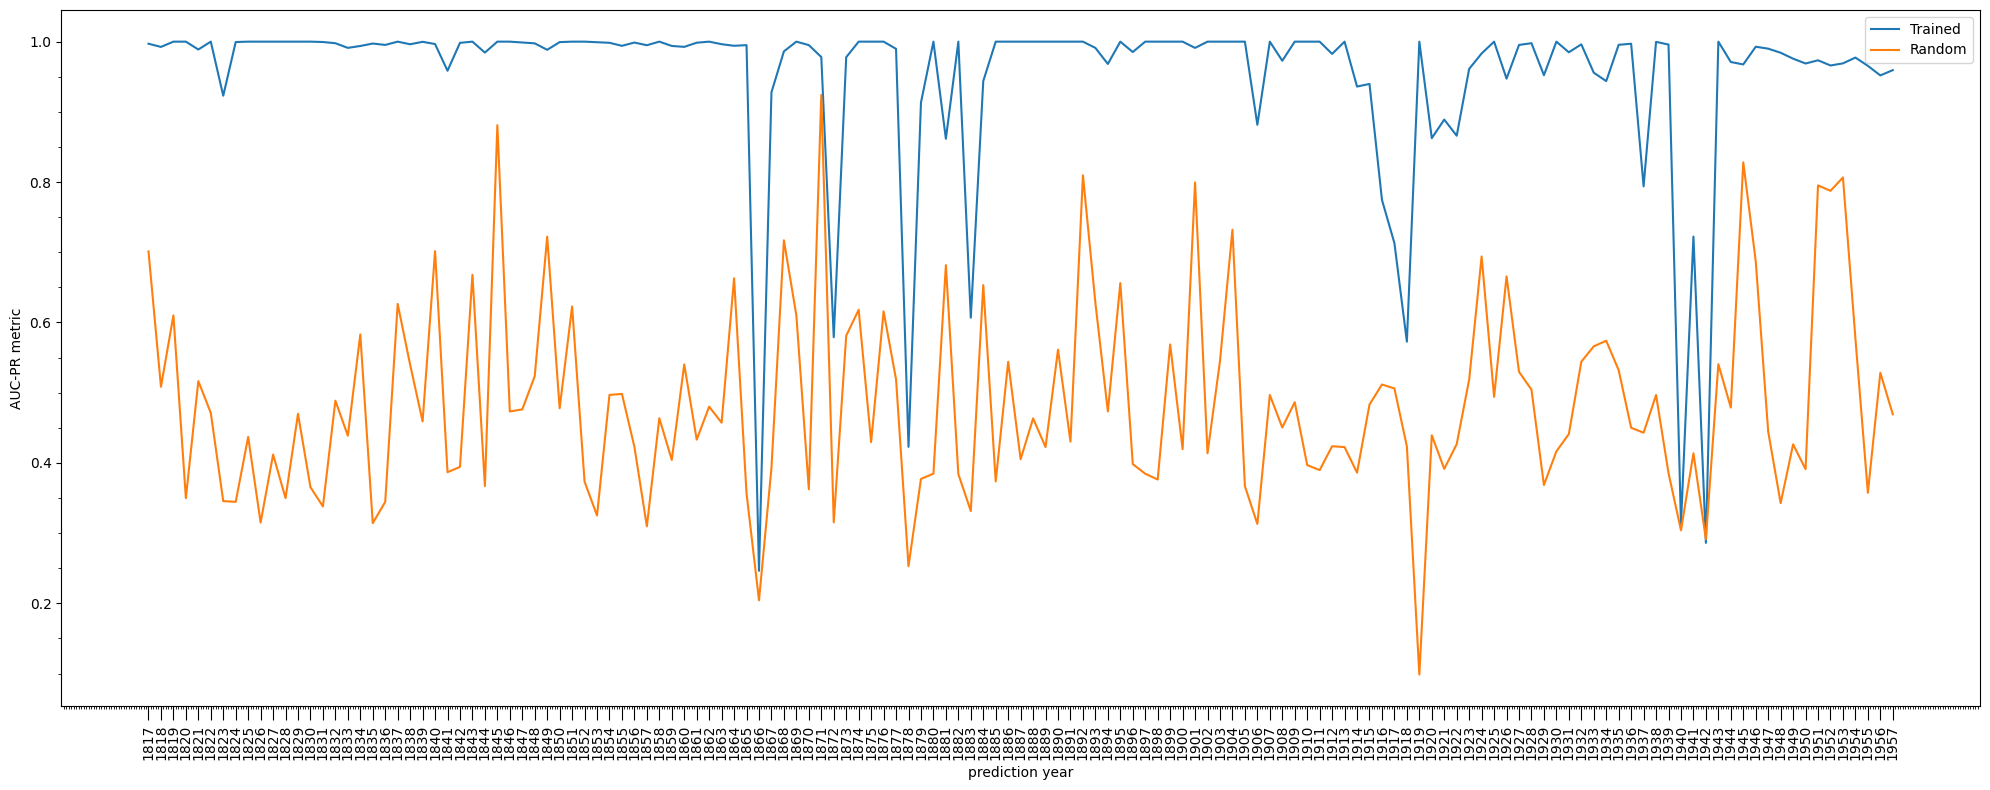

In [98]:
x = trained_results_df['Year'].values
y1 = trained_results_df['AUC-PR'].values
y2 = random_results_df['AUC-PR'].values[0:len(x)]
plt.figure(figsize=(20,8))
plt.plot(x,y1, label='Trained')
plt.plot(x,y2, label='Random')
plt.ylabel('AUC-PR metric')
plt.xlabel('prediction year')
plt.legend()

# Enable major and minor ticks
plt.minorticks_on()

# Set x-axis ticks and labels with vertical rotation
plt.xticks(ticks=x, labels=x, minor=False, rotation=90)  # Rotate labels to vertical

# Set x-axis ticks and labels
plt.xticks(ticks=x, labels=x, minor=False)  # Major ticks and labels
plt.tick_params(axis='x', which='major', length=10)  # Customize major tick length

plt.tight_layout()

plt.show()

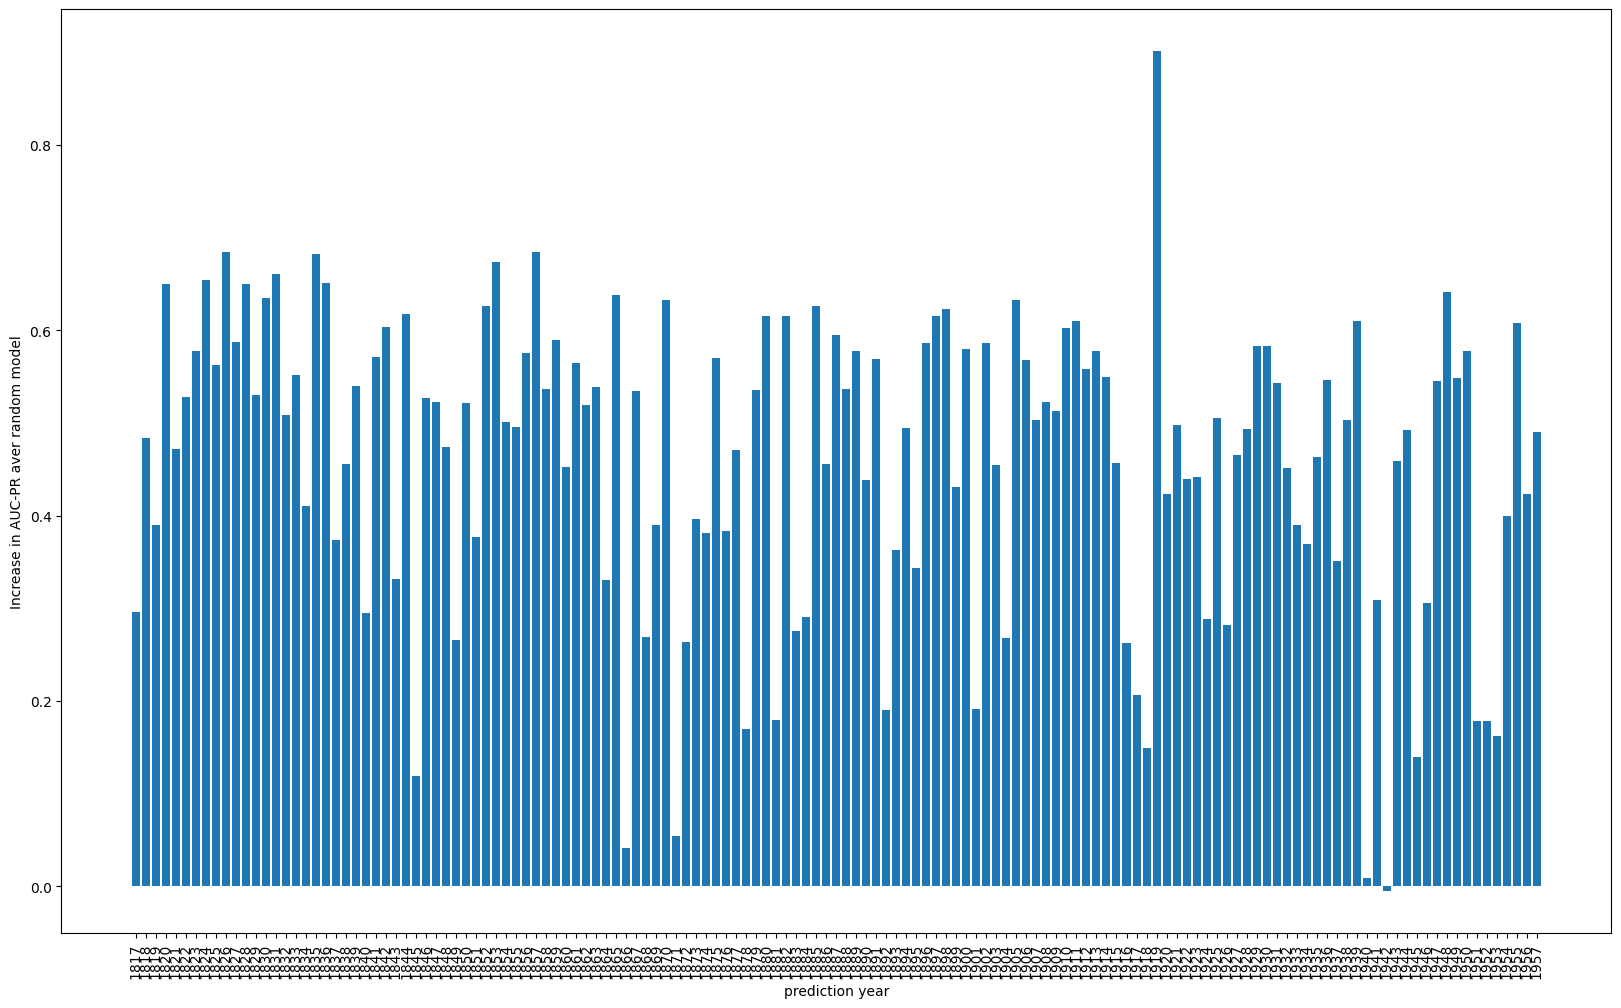

In [99]:
x = trained_results_df['Year'].values
y1 = trained_results_df['AUC-PR'].values
y2 = random_results_df['AUC-PR'].values[0:len(x)]
plt.figure(figsize=(20,12))
plt.bar([str(a) for a in x],y1-y2)
plt.ylabel('Increase in AUC-PR aver random model')
plt.xlabel('prediction year')
plt.xticks(rotation=90)
plt.show()

In [97]:
new_edges, deleted_edges = find_new_and_deleted_edges(temporal_edges_tensor[1865], temporal_edges_tensor[1866])
new_edges_unique_indices = find_unique_undirected_edges_indices(new_edges)
deduped_new_edges = new_edges[:,new_edges_unique_indices] if len(new_edges) > 0 else []
deleted_edges_unique_indices = find_unique_undirected_edges_indices(deleted_edges)
deduped_deleted_edges = deleted_edges[:,deleted_edges_unique_indices] if len(deleted_edges) > 0 else []

print("New Deduped Edges in Target Year:", deduped_new_edges)
print("New Edges Shape: ", new_edges.shape if len(new_edges) > 0 else None, "Deduped New Edges Shape: ", deduped_new_edges.shape if len(deduped_new_edges) > 0 else None)
print("Deleted Deduped Edges in Target Year:", deduped_deleted_edges)
print("Deleted Edges Shape: ", deleted_edges.shape if len(deleted_edges) > 0 else None, "Deduped Deleted Edges Shape: ", deduped_deleted_edges.shape if len(deduped_deleted_edges) > 0 else None)

New Deduped Edges in Target Year: tensor([[30, 27, 30, 44, 28],
        [27, 32, 32, 59, 27]])
New Edges Shape:  torch.Size([2, 10]) Deduped New Edges Shape:  torch.Size([2, 5])
Deleted Deduped Edges in Target Year: tensor([[43, 47, 49, 50, 43, 51, 54, 54, 51, 42, 44, 52, 49, 43, 47, 48, 51, 52,
         48, 42, 51, 52, 43, 47, 48, 54, 54, 54, 51, 42, 47, 54, 50, 51, 50, 42,
         43, 51, 43, 48],
        [48, 54, 42, 49, 42, 50, 48, 42, 49, 51, 50, 42, 48, 52, 50, 47, 44, 47,
         50, 47, 54, 49, 51, 49, 44, 52, 49, 43, 48, 48, 43, 50, 52, 47, 42, 44,
         50, 52, 49, 52]])
Deleted Edges Shape:  torch.Size([2, 80]) Deduped Deleted Edges Shape:  torch.Size([2, 40])


In [98]:
def get_predictions_for_edges(edge_indices, test_edge_pred):
    return test_edge_pred[edge_indices]

# Get predictions for new edges
new_edge_predictions = get_predictions_for_edges(new_edges_unique_indices, test_edge_pred)
print("Predictions for New Edges:", new_edge_predictions)

# Get predictions for deleted edges
deleted_edge_predictions = get_predictions_for_edges(deleted_edges_unique_indices, test_edge_pred)
print("Predictions for Deleted Edges:", deleted_edge_predictions)

Predictions for New Edges: [0.97154397 0.97154397 0.9925054  0.96813947 0.9925054 ]
Predictions for Deleted Edges: [9.7154397e-01 9.7154397e-01 9.9250537e-01 9.6813947e-01 9.8344892e-01
 9.9250537e-01 9.8344892e-01 9.4805759e-01 9.4805759e-01 6.8002129e-01
 6.8002129e-01 9.9716693e-01 9.9716693e-01 9.3426514e-01 8.5560751e-01
 9.2357814e-01 7.5731105e-01 8.5560751e-01 8.2495517e-01 9.0576571e-01
 7.5731105e-01 8.2495517e-01 9.0576571e-01 4.2989543e-01 9.9669325e-01
 9.9669325e-01 9.9559289e-01 9.9666828e-01 7.6853109e-07 2.8235610e-05
 7.8353736e-07 3.6266795e-01 1.2144587e-03 1.3153059e-06 2.5079042e-02
 8.2341495e-07 6.1792571e-07 2.0436975e-05 6.2607903e-08 7.3189693e-07]


In [99]:
def count_predictions_above_threshold(predictions, threshold):
    # Count the number of predictions greater than the threshold
    count_above_threshold = (predictions > threshold).sum().item()
    
    # Calculate the ratio
    total_predictions = len(predictions)
    ratio_above_threshold = count_above_threshold / total_predictions if total_predictions > 0 else 0.0
    
    return count_above_threshold, ratio_above_threshold
    
# Define threshold
x = th

# Get count and ratio
count_above_x, ratio_above_x = count_predictions_above_threshold(new_edge_predictions, x)

print(f"Number of predictions greater than {x}: {count_above_x}")
print(f"Ratio of predictions greater than {x}: {ratio_above_x:.2f}")


Number of predictions greater than 0.42989543080329895: 5
Ratio of predictions greater than 0.42989543080329895: 1.00


In [100]:
predictions_above_threshold = np.where(new_edge_predictions > x)[0]
predictions_below_threshold = np.where(deleted_edge_predictions <= x)[0]
print(new_edge_predictions.shape, predictions_above_threshold.shape, \
    predictions_below_threshold.shape, \
    new_edges[:,new_edges_unique_indices][:,predictions_above_threshold].shape, \
    deleted_edges[:,deleted_edges_unique_indices][:,predictions_below_threshold].shape)

print(new_edges[:,new_edges_unique_indices][:,predictions_above_threshold])
print(deleted_edges[:,deleted_edges_unique_indices][:,predictions_below_threshold])

(5,) (5,) (13,) torch.Size([2, 5]) torch.Size([2, 13])
tensor([[30, 27, 30, 44, 28],
        [27, 32, 32, 59, 27]])
tensor([[47, 51, 42, 47, 54, 50, 51, 50, 42, 43, 51, 43, 48],
        [49, 48, 48, 43, 50, 52, 47, 42, 44, 50, 52, 49, 52]])


In [88]:
# this cell gives us country pairs that have been newly added and correctly predicted by the model as positive edges (new defense alliances)

test_pairs = new_edges[:,new_edges_unique_indices][:,predictions_above_threshold]
for i in range(test_pairs.shape[1]):
    print(test_pairs[:,i], np.array(countries)[test_pairs[:,i][0]], np.array(countries)[test_pairs[:,i][1]])
    print(country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_pairs[:,i]])])
    print()

tensor([30, 27]) 145 130
   StateAbb  CCode StateNme
30      ECU    130  Ecuador
33      BOL    145  Bolivia

tensor([27, 32]) 130 155
   StateAbb  CCode StateNme
30      ECU    130  Ecuador
36      CHL    155    Chile

tensor([30, 32]) 145 155
   StateAbb  CCode StateNme
33      BOL    145  Bolivia
36      CHL    155    Chile

tensor([44, 59]) 255 325
   StateAbb  CCode StateNme
57      GMY    255  Germany
77      ITA    325    Italy

tensor([28, 27]) 135 130
   StateAbb  CCode StateNme
30      ECU    130  Ecuador
31      PER    135     Peru



In [76]:
# this cell gives us country pairs that have been newly deleted and correctly predicted by the model as negative edges (changing from a defense alliance to no defense alliance)

test_pairs = deleted_edges[:,deleted_edges_unique_indices][:,predictions_below_threshold]
print(len(test_pairs[0]))
for i in range(test_pairs.shape[1]):
    print(test_pairs[:,i], np.array(countries)[test_pairs[:,i][0]], np.array(countries)[test_pairs[:,i][1]])
    print(country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_pairs[:,i]])])
    print()

14
tensor([42, 51]) 240 275
   StateAbb  CCode           StateNme
55      HAN    240            Hanover
65      HSG    275  Hesse Grand Ducal

tensor([44, 50]) 255 273
   StateAbb  CCode         StateNme
57      GMY    255          Germany
64      HSE    273  Hesse Electoral

tensor([51, 48]) 275 269
   StateAbb  CCode           StateNme
62      SAX    269             Saxony
65      HSG    275  Hesse Grand Ducal

tensor([42, 48]) 240 269
   StateAbb  CCode StateNme
55      HAN    240  Hanover
62      SAX    269   Saxony

tensor([47, 43]) 267 245
   StateAbb  CCode StateNme
56      BAV    245  Bavaria
61      BAD    267    Baden

tensor([54, 50]) 300 273
   StateAbb  CCode         StateNme
64      HSE    273  Hesse Electoral
69      AUH    300  Austria-Hungary

tensor([50, 52]) 273 280
   StateAbb  CCode              StateNme
64      HSE    273       Hesse Electoral
66      MEC    280  Mecklenburg Schwerin

tensor([51, 47]) 275 267
   StateAbb  CCode           StateNme
61      BAD    26

In [101]:
# this cell gives us country pairs that have been newly deleted and correctly predicted by the model as negative edges (changing from a defense alliance to no defense alliance)

test_pairs = deleted_edges[:,deleted_edges_unique_indices][:,predictions_below_threshold]
print(len(test_pairs[0]))
for i in range(test_pairs.shape[1]):
    print(test_pairs[:,i], np.array(countries)[test_pairs[:,i][0]], np.array(countries)[test_pairs[:,i][1]])
    print(country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_pairs[:,i]])])
    print()

13
tensor([47, 49]) 267 271
   StateAbb  CCode      StateNme
61      BAD    267         Baden
63      WRT    271  Wuerttemburg

tensor([51, 48]) 275 269
   StateAbb  CCode           StateNme
62      SAX    269             Saxony
65      HSG    275  Hesse Grand Ducal

tensor([42, 48]) 240 269
   StateAbb  CCode StateNme
55      HAN    240  Hanover
62      SAX    269   Saxony

tensor([47, 43]) 267 245
   StateAbb  CCode StateNme
56      BAV    245  Bavaria
61      BAD    267    Baden

tensor([54, 50]) 300 273
   StateAbb  CCode         StateNme
64      HSE    273  Hesse Electoral
69      AUH    300  Austria-Hungary

tensor([50, 52]) 273 280
   StateAbb  CCode              StateNme
64      HSE    273       Hesse Electoral
66      MEC    280  Mecklenburg Schwerin

tensor([51, 47]) 275 267
   StateAbb  CCode           StateNme
61      BAD    267              Baden
65      HSG    275  Hesse Grand Ducal

tensor([50, 42]) 273 240
   StateAbb  CCode         StateNme
55      HAN    240          

In [96]:
def top_k_accuracy(y_true, y_pred, k=5):
    return sum(y_true[np.argsort(y_pred)[-k:]])


In [95]:
top_k_accuracy(test_labels, test_edge_pred, k=100), top_k_accuracy(test_labels, test_edge_pred, k=2279)


(100, 409)

In [92]:
threshold = 0.496984
test_pred_th = np.where(test_edge_pred > threshold, 1, 0)
np.unique(test_pred_th, return_counts=True)


(array([0, 1]), array([516, 302]))

In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(test_labels, test_pred_th)
print("Confusion Matrix:")
print(cm)

# Initialize lists to store indices for each type of error
true_positive_indices = []
true_negative_indices = []
false_positive_indices = []
false_negative_indices = []

# Iterate through true and predicted labels to find indices
for i, (true_label, pred_label) in enumerate(zip(test_labels, test_pred_th)):
    if true_label == 1 and pred_label == 1:
        true_positive_indices.append(i)
    elif true_label == 0 and pred_label == 0:
        true_negative_indices.append(i)
    elif true_label == 0 and pred_label == 1:
        false_positive_indices.append(i)
    elif true_label == 1 and pred_label == 0:
        false_negative_indices.append(i)

# Print out the indices for each type of error
#print("True Positive Indices:", true_positive_indices)
#print("True Negative Indices:", true_negative_indices)
print("False Positive Indices:", len(false_positive_indices))
print("False Negative Indices:", len(false_negative_indices))


Confusion Matrix:
[[409   0]
 [107 302]]
False Positive Indices: 0
False Negative Indices: 107


In [108]:
k = 20
for idx in np.argsort(test_edge_pred)[-k:]:
    if test_labels[idx] != 1:
        fp_df = country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_edge_index[:,idx]])]
        print(idx, test_edge_pred[idx])
        print(fp_df)
        print()
        

In [109]:
country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_edge_index[:,0]])]


NameError: name 'test_edge_index' is not defined

In [ ]:
k = 200
for idx in np.argsort(test_edge_pred)[0:k]:
    if test_labels[idx] != 0:
        fp_df = country_codes_df[country_codes_df['CCode'].isin(np.array(countries)[test_edge_index[:,idx]])]
        print(idx, test_edge_pred[idx])
        print(fp_df)
        print()

In [ ]:
def visualize_embeddings(reduced_embeddings, actual_edge_index, predicted_edge_index, pos_labels, title='Node Embeddings'):
    # Reduce dimensionality to 2D

    plt.figure(figsize=(20, 20))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Nodes')

    # Plot actual positive edges
    for i, (src, dst) in enumerate(actual_edge_index.t().cpu().numpy()):
        plt.plot([reduced_embeddings[src, 0], reduced_embeddings[dst, 0]], 
                 [reduced_embeddings[src, 1], reduced_embeddings[dst, 1]], 
                 'gray', alpha=0.5, label='Actual Positive' if i == 0 else "")

    # Plot predicted positive edges
    for i, (src, dst) in enumerate(predicted_edge_index.t().cpu().numpy()):
        plt.plot([reduced_embeddings[src, 0], reduced_embeddings[dst, 0]], 
                 [reduced_embeddings[src, 1], reduced_embeddings[dst, 1]], 
                 'red', linestyle='--', alpha=0.5, label='Predicted Positive' if i == 0 else "")

    plt.title(title)
    plt.legend()
    plt.show()
    
threshold = 0.75  #0.50
actual_pos_edges = all_edges[:, labels == 1]
predicted_pos_edges = all_edges[:, (torch.sigmoid(edge_pred) > threshold).nonzero(as_tuple=True)[0]]
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings.detach().cpu().numpy())
title = f'Node Embeddings for Year {test_year}\nActual Edges: {actual_pos_edges.shape[1]},Predicted Edges: {predicted_pos_edges.shape[1]}'
visualize_embeddings(reduced_embeddings, actual_pos_edges, predicted_pos_edges, labels, title=title)


In [ ]:
import networkx as nx
import plotly.graph_objs as go

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges
for i in range(len(reduced_embeddings)):
    G.add_node(i, pos=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

for src, dst in actual_pos_edges.t().cpu().numpy():
    G.add_edge(src, dst, color='gray')

#for src, dst in predicted_pos_edges.t().cpu().numpy():
#    G.add_edge(src, dst, color='red')

# Extract edge trace
edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace.append(go.Scatter(x=[x0, x1], y=[y0, y1],
                                 line=dict(width=0.5, color=edge[2]['color']),
                                 hoverinfo='none',
                                 mode='lines'))

# Extract node trace
node_trace = go.Scatter(x=[G.nodes[i]['pos'][0] for i in G.nodes],
                        y=[G.nodes[i]['pos'][1] for i in G.nodes],
                        mode='markers',
                        marker=dict(size=10, color='blue'),
                        text=[str(i) for i in G.nodes],
                        hoverinfo='text')

# Create the plot
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(title='Actual Edges -- Year ' + str(test_year),
                                 titlefont_size=16,
                                 showlegend=False,
                                 hovermode='closest',
                                 margin=dict(b=20, l=5, r=5, t=40),
                                 xaxis=dict(showgrid=False, zeroline=False),
                                 yaxis=dict(showgrid=False, zeroline=False)))

fig.show()


In [ ]:
import networkx as nx
import plotly.graph_objs as go

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges
for i in range(len(reduced_embeddings)):
    G.add_node(i, pos=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

#for src, dst in actual_pos_edges.t().cpu().numpy():
#    G.add_edge(src, dst, color='gray')

for src, dst in predicted_pos_edges.t().cpu().numpy():
    G.add_edge(src, dst, color='red')

# Extract edge trace
edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace.append(go.Scatter(x=[x0, x1], y=[y0, y1],
                                 line=dict(width=0.5, color=edge[2]['color']),
                                 hoverinfo='none',
                                 mode='lines'))

# Extract node trace
node_trace = go.Scatter(x=[G.nodes[i]['pos'][0] for i in G.nodes],
                        y=[G.nodes[i]['pos'][1] for i in G.nodes],
                        mode='markers',
                        marker=dict(size=10, color='blue'),
                        text=[str(i) for i in G.nodes],
                        hoverinfo='text')

# Create the plot
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(title='Predicted Edges -- Year ' + str(test_year),
                                 titlefont_size=16,
                                 showlegend=False,
                                 hovermode='closest',
                                 margin=dict(b=20, l=5, r=5, t=40),
                                 xaxis=dict(showgrid=False, zeroline=False),
                                 yaxis=dict(showgrid=False, zeroline=False)))

fig.show()


In [ ]:
import pandas as pd

# Function to collect predictions for multiple years after training period
def predict_multiple_years(model, data, years, num_nodes, hidden):
    results = []
    for year in years:
        edge_index = temporal_edges_tensor[year]
        all_edges, labels = create_samples(edge_index, num_nodes)
        data.edge_index = edge_index
        accuracy, precision, recall, f1, auc_pr, embeddings, pred, edge_pred = test(data, all_edges, labels, hidden)
        results.append({
            'Year': year,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-PR': auc_pr
        })
    return results

# Define the years to predict
prediction_years = [2022, 2023, 2024]  # Replace with your desired years

# Data object for predictions
data = Data(x=x, edge_index=None)  # Initialize with the node features

# Predict for the specified years and store results in a DataFrame
results = predict_multiple_years(model, data, prediction_years, num_nodes, hidden)
results_df = pd.DataFrame(results)

print(results_df)
